In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist


In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


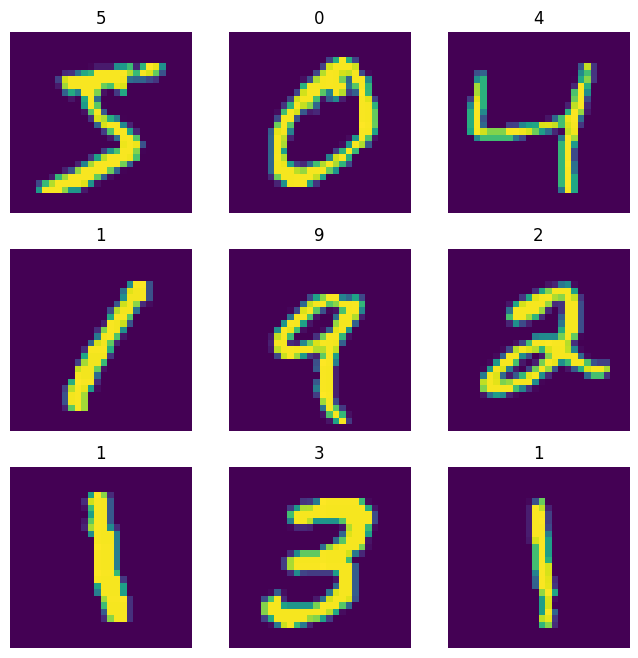

In [5]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis =0)
x_test = tf.keras.utils.normalize(x_test, axis =0)

Building Model

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics =['accuracy'])

In [10]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs = 15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 12s 6ms/step - loss: 0.5980 - accuracy: 0.8193 - val_loss: 0.3764 - val_accuracy: 0.9087
Epoch 2/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2539 - accuracy: 0.9252 - val_loss: 0.3164 - val_accuracy: 0.9227
Epoch 3/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1849 - accuracy: 0.9442 - val_loss: 0.2329 - val_accuracy: 0.9455
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1455 - accuracy: 0.9555 - val_loss: 0.2054 - val_accuracy: 0.9541
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1180 - accuracy: 0.9641 - val_loss: 0.1847 - val_accuracy: 0.9595
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0970 - accuracy: 0.9703 - val_loss: 0.2156 - val_accuracy: 0.9548
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0813 - accuracy: 0.9746 - val_loss: 0.2036 - val_accuracy: 0.9592

In [13]:
import cv2

In [34]:
image = cv2.imread('5.png')[:,:,0]
image = np.invert(np.array([image]))

1/1 [==============================] - 0s 20ms/step
3


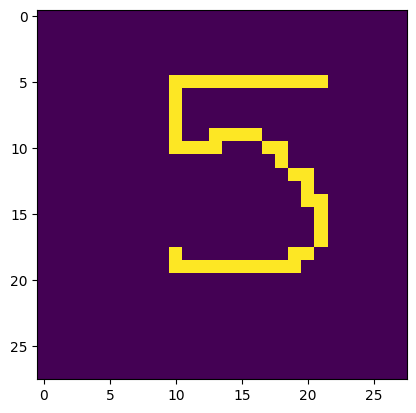

In [35]:
output = model.predict(image)
plt.imshow(image[0])
print(np.argmax(output))

In [22]:
model.save('/content/hand_written_Digit_recog_model.keras')

In [18]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00


In [26]:
!streamlit run /content/app.py &> /content/logs.txt &

In [24]:
!npx localtunnel --port 8501

npx: installed 22 in 2.059s
your url is: https://odd-numbers-rush.loca.lt
^C


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
